In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
IMG_SIZE = 32
BATCH_SIZE = 4
# Letters with its prediction number
letter_dict = { 0:'а', 1:'ә', 2:'з', 3:'и', 4:'й', 5:'к', 
            6:'қ', 7:'л', 8:'м', 9:'н', 10:'ң', 11:'о',
            12:'б', 13:'ө', 14:'п', 15:'р', 16:'с', 17:'т',
            18:'у', 19:'ұ', 20:'ү', 21:'ф', 22:'х', 23:'в',
            24:'ц', 25:'ч', 26:'ш', 27:'щ', 28:'һ', 29:'ъ',
            30:'ы', 31:'і', 32:'ь', 33:'э', 34:'г', 35:'ю',
            36:'я', 37:'ғ', 38:'д', 39:'е', 40:'ё', 41:'ж'}

In [ ]:
train_dir = r'C:\Users\Адиль\Desktop\adp-final\kazakh-letters-greyscale\train-dir'
validation_dir = r'C:\Users\Адиль\Desktop\adp-final\kazakh-letters-greyscale\val-dir'

for i in range(42):
  print('training characters for {}-train images:'.format(i), len(os.listdir(r'C:\Users\Адиль\Desktop\adp-final\kazakh-letters-greyscale\train-dir\{}-train'.format(i))),end="  ")
  print('validation characters for {}-val images:'.format(i), len(os.listdir(r'C:\Users\Адиль\Desktop\adp-final\kazakh-letters-greyscale\val-dir\{}-val'.format(i))))


training characters for 0-train images: 259  validation characters for 0-val images: 105
training characters for 1-train images: 244  validation characters for 1-val images: 105
training characters for 2-train images: 245  validation characters for 2-val images: 105
training characters for 3-train images: 255  validation characters for 3-val images: 105
training characters for 4-train images: 245  validation characters for 4-val images: 115
training characters for 5-train images: 255  validation characters for 5-val images: 115
training characters for 6-train images: 245  validation characters for 6-val images: 105
training characters for 7-train images: 255  validation characters for 7-val images: 105
training characters for 8-train images: 251  validation characters for 8-val images: 105
training characters for 9-train images: 245  validation characters for 9-val images: 115
training characters for 10-train images: 245  validation characters for 10-val images: 109
training characters

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode='grayscale')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode='grayscale')


for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 10421 images belonging to 42 classes.
data batch shape: (4, 32, 32, 1)
labels batch shape: (4, 42)
Found 4470 images belonging to 42 classes.
data batch shape: (4, 32, 32, 1)
labels batch shape: (4, 42)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(42, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/5


C:\Users\Адиль\AppData\Local\Temp\ipykernel_12828\45828740.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


2606/2606 [==============================] - 15s 5ms/step - loss: 2.6505 - accuracy: 0.2483 - val_loss: 1.6725 - val_accuracy: 0.4949
Epoch 2/5
2606/2606 [==============================] - 13s 5ms/step - loss: 1.2190 - accuracy: 0.6281 - val_loss: 1.0411 - val_accuracy: 0.6834
Epoch 3/5
2606/2606 [==============================] - 14s 5ms/step - loss: 0.7744 - accuracy: 0.7651 - val_loss: 0.7581 - val_accuracy: 0.7758
Epoch 4/5
2606/2606 [==============================] - 14s 6ms/step - loss: 0.5704 - accuracy: 0.8237 - val_loss: 0.6300 - val_accuracy: 0.8049
Epoch 5/5
2606/2606 [==============================] - 14s 5ms/step - loss: 0.4635 - accuracy: 0.8600 - val_loss: 0.6021 - val_accuracy: 0.8318


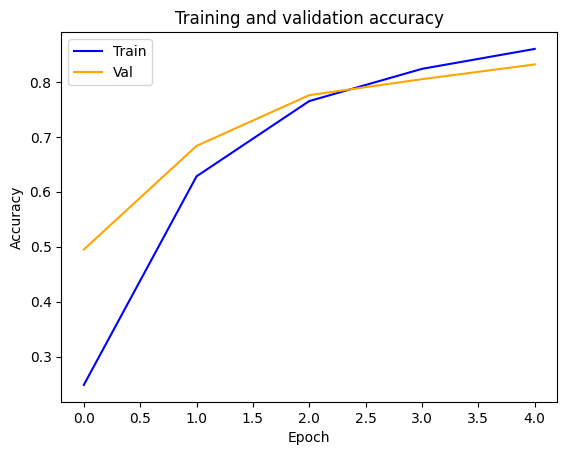

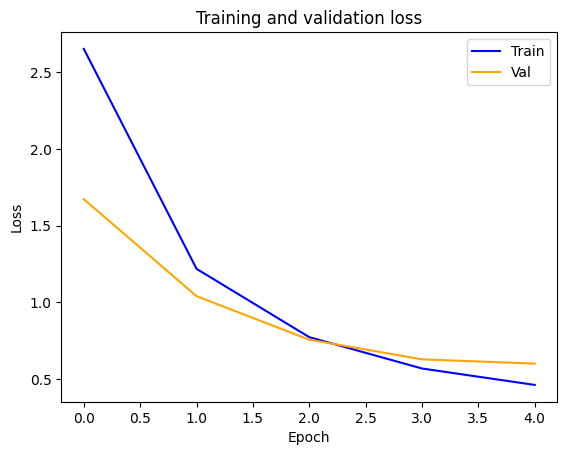

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=5,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


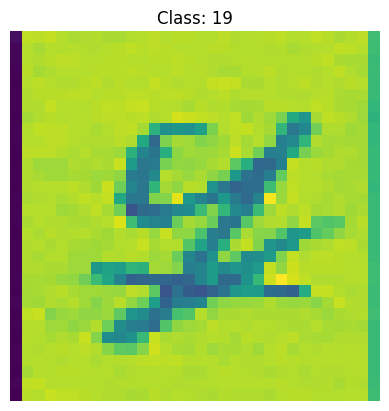

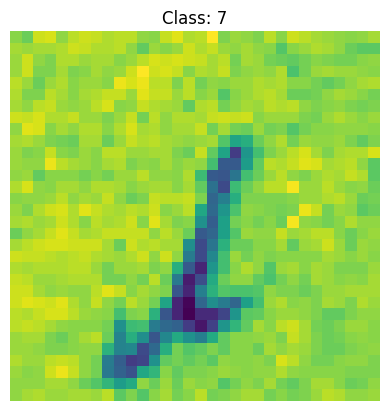

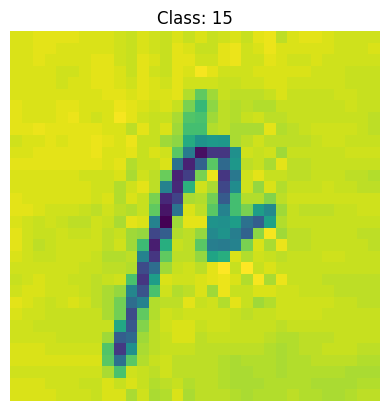

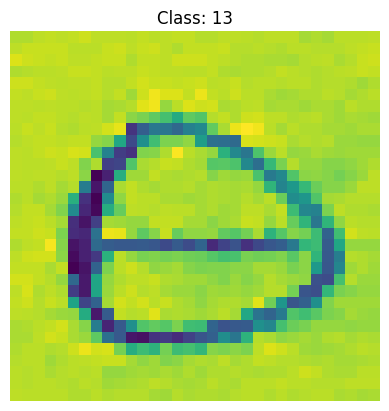

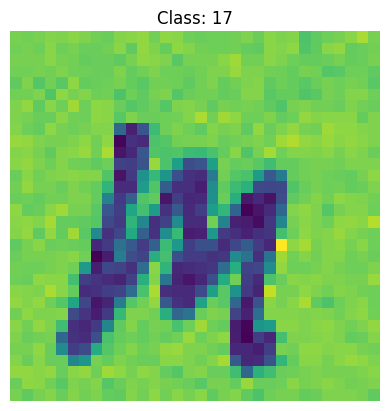

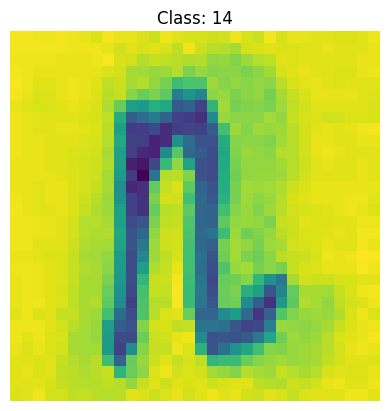

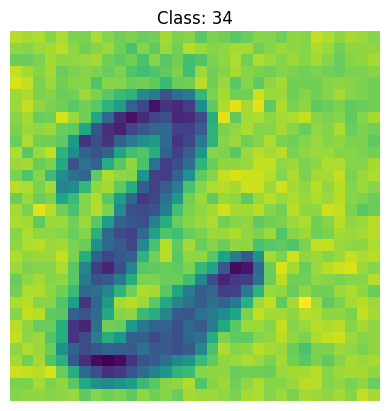

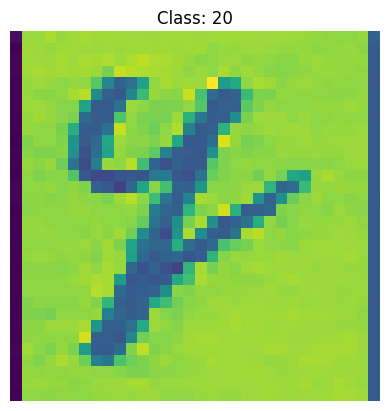

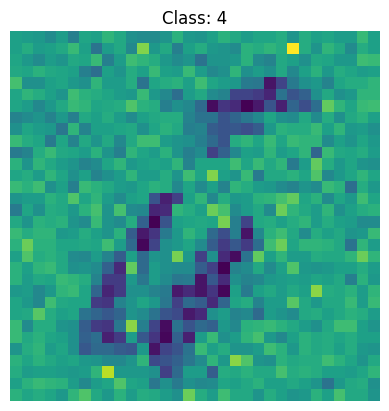

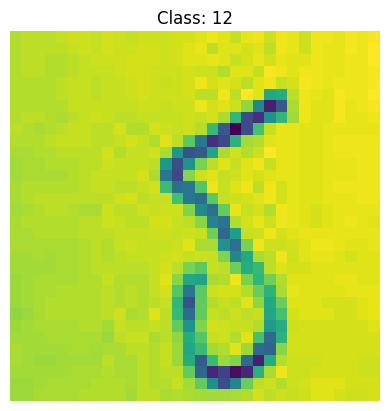

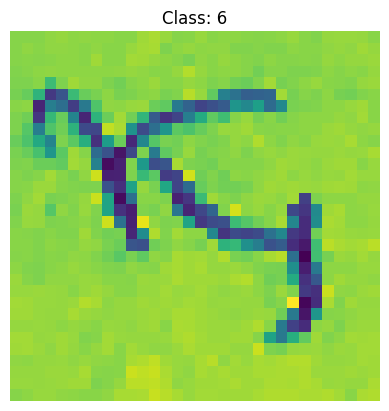

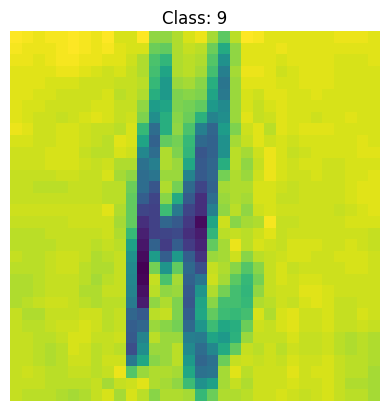

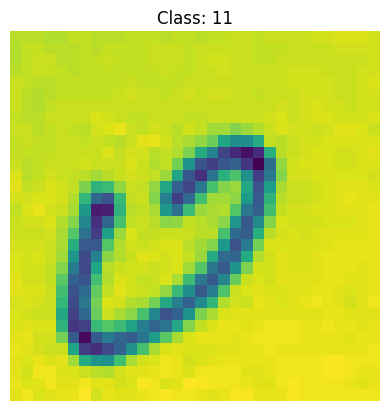

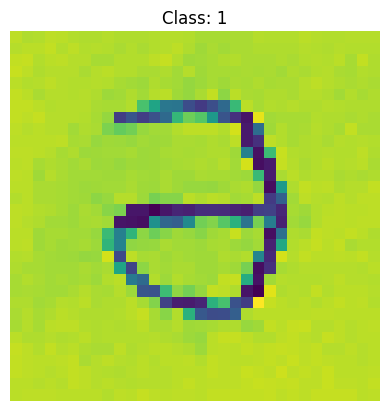

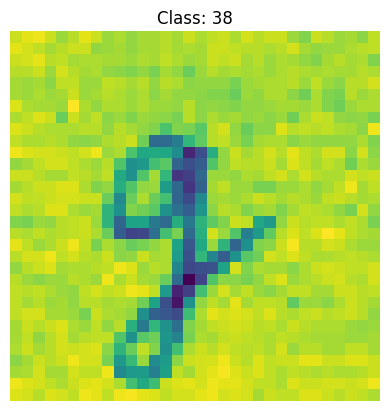

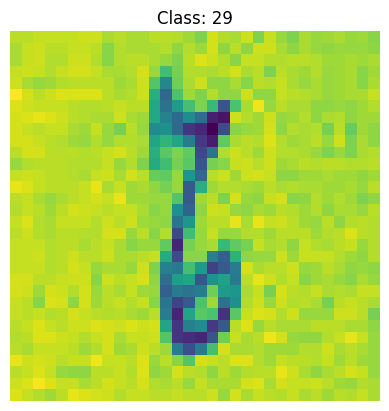

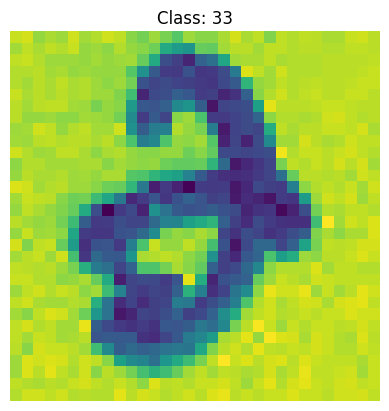

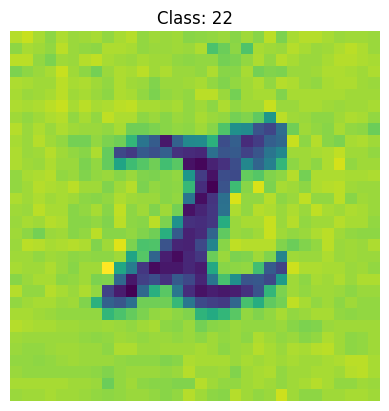

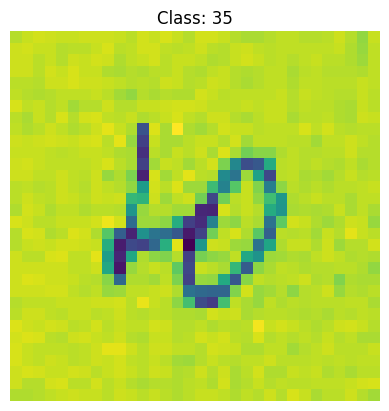

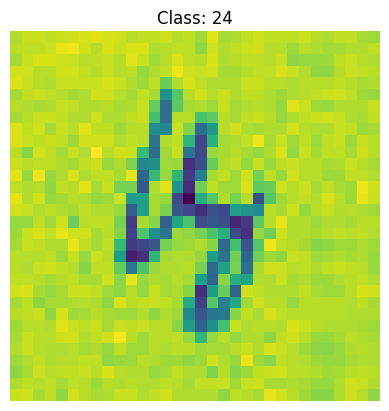

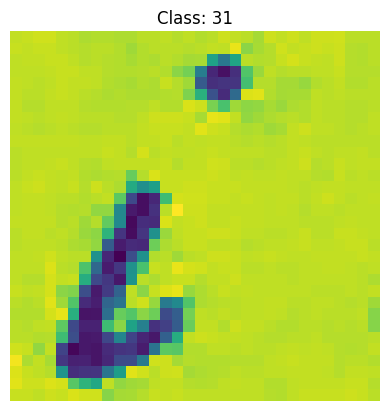

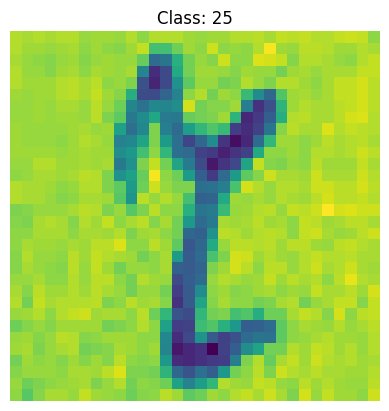

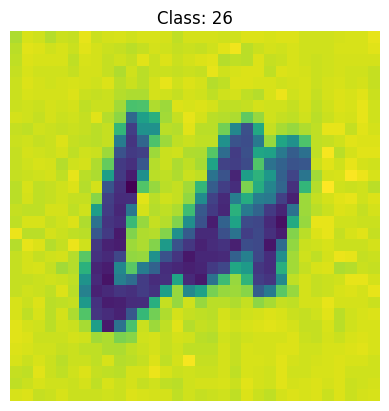

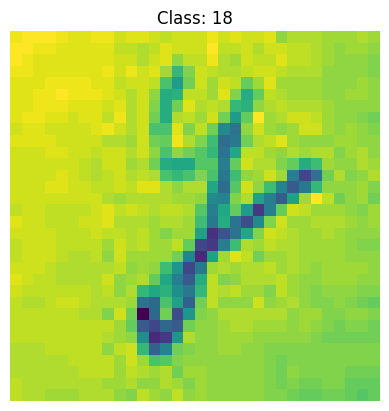

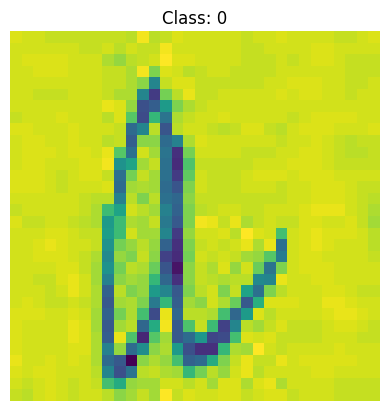

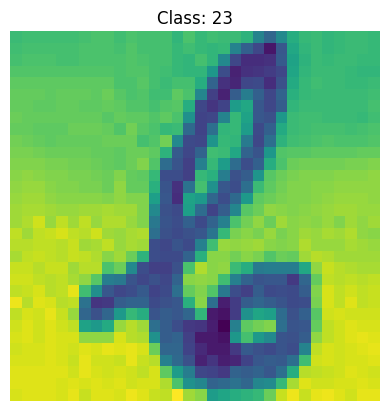

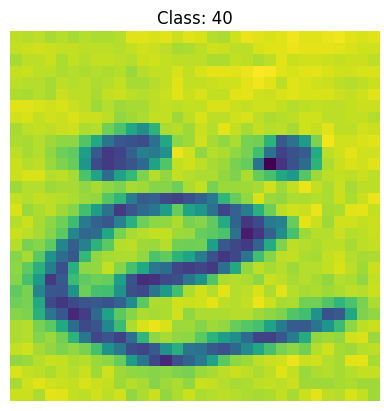

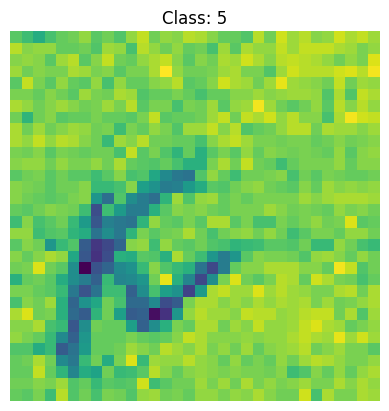

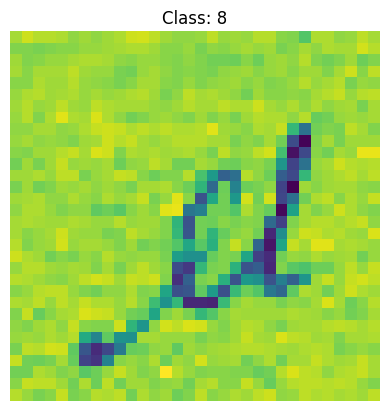

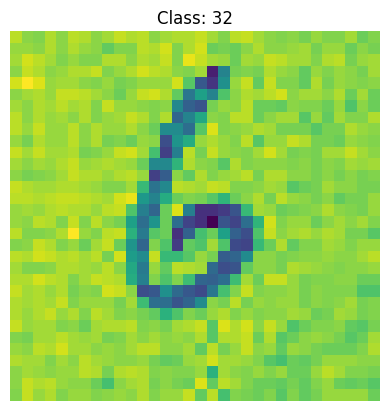

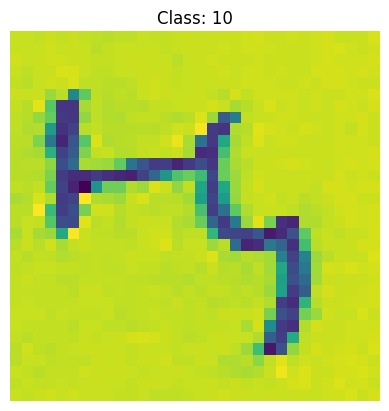

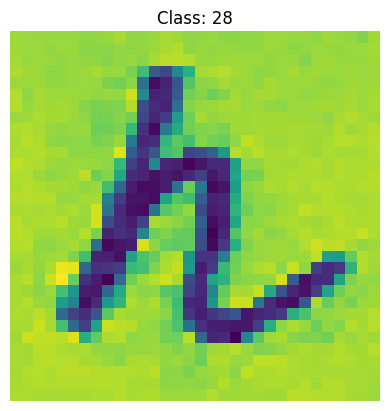

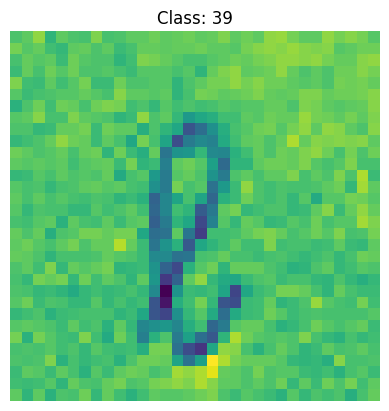

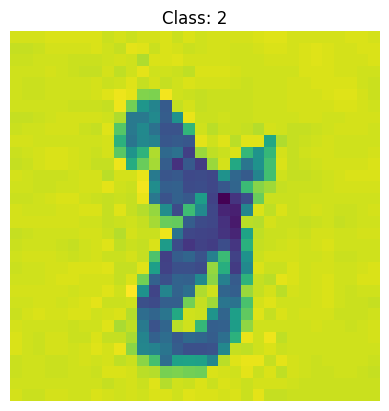

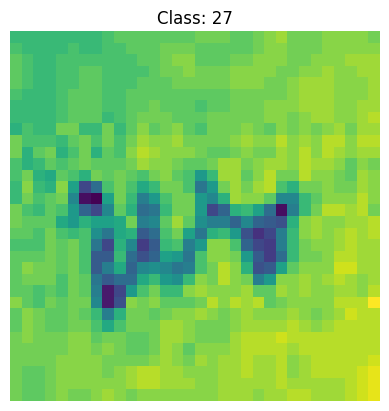

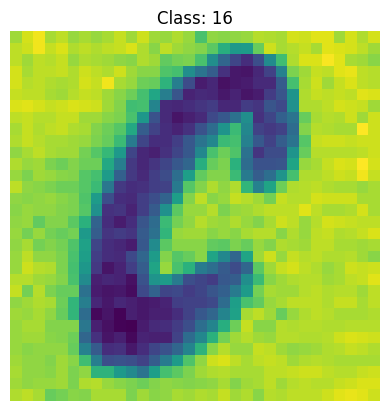

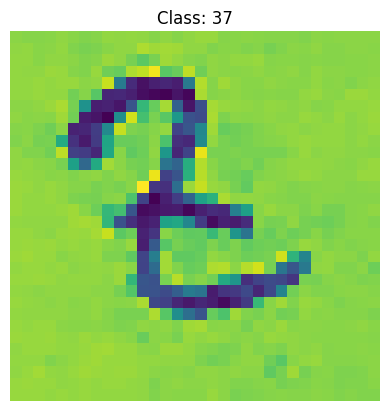

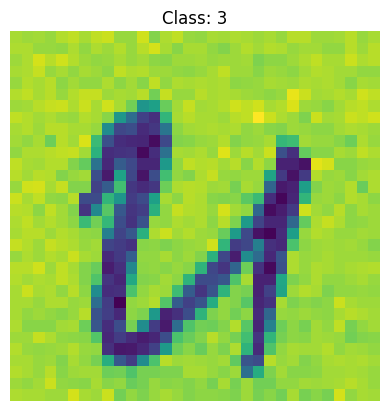

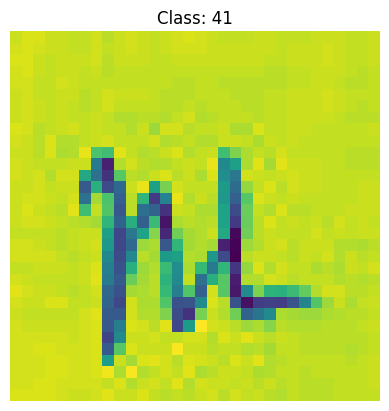

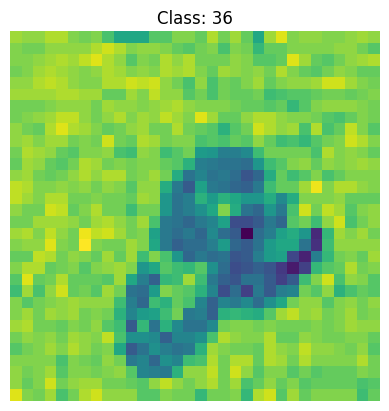

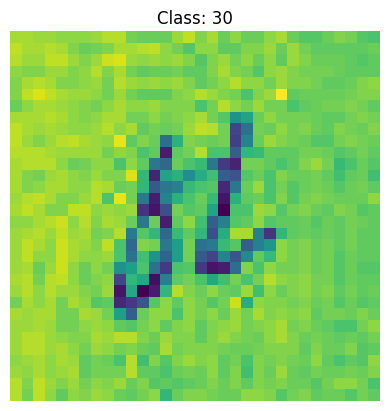

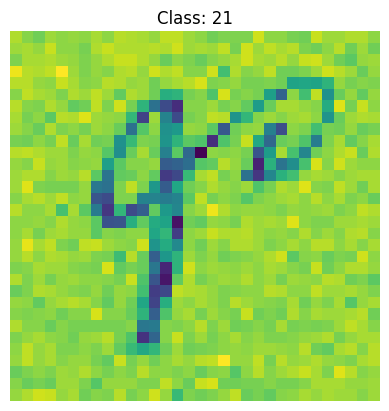

In [ ]:
# Keep track of which class we're on
current_class = 0

# Keep track of which images we've seen
seen_classes = set()

for data_batch, labels_batch in train_generator:
    # Iterate over each image in the batch
    for i in range(data_batch.shape[0]):
        # Get the class label
        label = labels_batch[i].argmax()
        # If we haven't seen this class yet
        if label not in seen_classes:
            # Add it to the set of seen classes
            seen_classes.add(label)
            # Display the image
            plt.imshow(data_batch[i])
            plt.axis('off')
            plt.title(f'Class: {label}')
            plt.show()
            # If we've seen all 42 classes, stop
            if len(seen_classes) == 42:
                break
    # If we've seen all 42 classes, stop
    if len(seen_classes) == 42:
        break

1/1 [==============================] - 0s 17ms/step


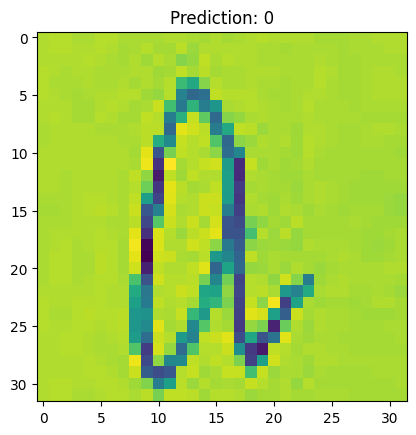

In [ ]:
# Load the image from file
img = Image.open(r'C:\Users\Адиль\Downloads\0-101-val.jpg')

# Resize the image to the size required by the model
img = img.resize((IMG_SIZE, IMG_SIZE))

# Convert the image to a numpy array
img_array = np.array(img)

# Normalize the image data
img_array = img_array / 255.0

# Expand the dimensions of the image array
img_array = np.expand_dims(img_array, axis=0)

# Use the model to make a prediction on the preprocessed image
prediction = model.predict(img_array)

# Convert the prediction from a numerical format to a categorical format
prediction_class = np.argmax(prediction)

plt.imshow(img)
plt.title(f'Prediction: {prediction_class}')
plt.show()

In [ ]:
model.save(r"C:\Users\Адиль\Downloads\my_model.h5")